In [1]:
import pandas as pd
from pandas import Series, DataFrame


In [2]:
titanic_df = pd.read_csv('train.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

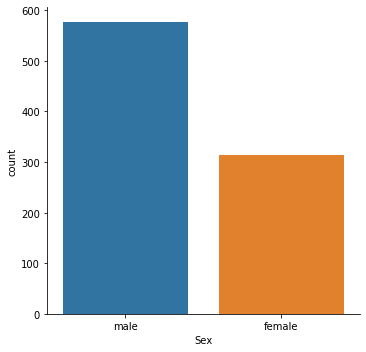

In [6]:
sns.catplot('Sex', data=titanic_df, kind="count")

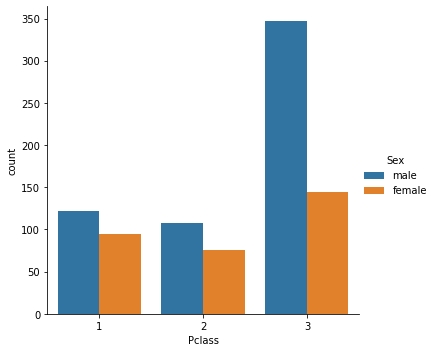

In [7]:
sns.catplot('Pclass', data = titanic_df, hue='Sex', kind='count')

In [8]:
 def male_female_child(passenger):
        
    age, sex = passenger
    
    if age < 16 :
        return 'child'
    else:
        return sex
    
# define a new column called 'person',specify axis=1 for columns  
titanic_df['Person'] = titanic_df[['Age', 'Sex']].apply (male_female_child, axis =1)

In [9]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


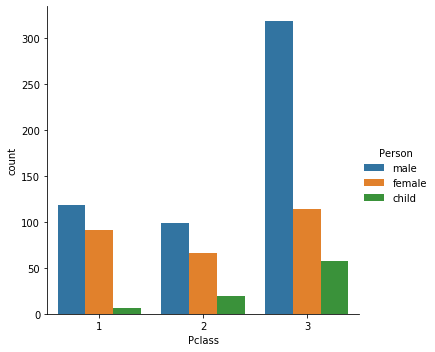

In [10]:
sns.catplot('Pclass', data = titanic_df, hue='Person', kind ='count')

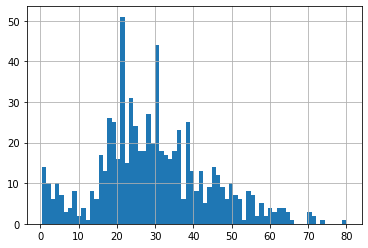

In [11]:
titanic_df['Age'].hist(bins=70)

In [12]:
titanic_df['Age'].mean()

29.69911764705882

In [13]:
titanic_df['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

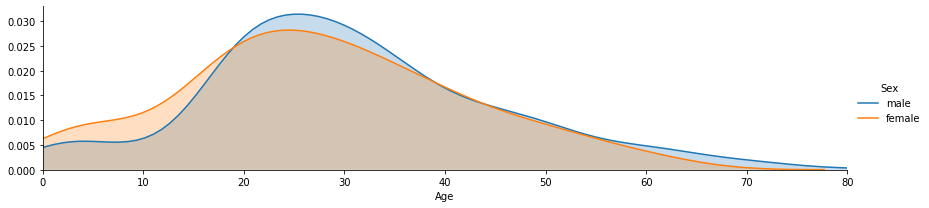

In [14]:
fig = sns.FacetGrid(titanic_df, hue ="Sex",aspect = 4)

fig.map(sns.kdeplot,'Age', shade =True)

#the oldest passenger
oldest = titanic_df['Age'].max()

fig.set(xlim = (0,oldest))

fig.add_legend()

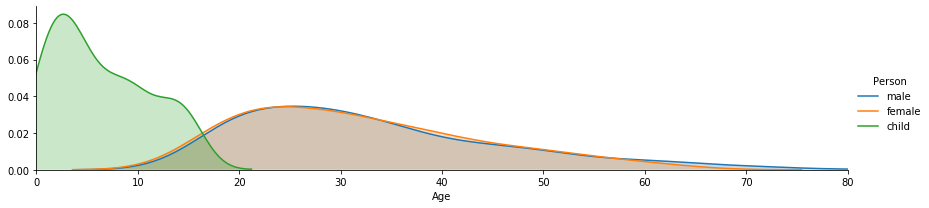

In [15]:

fig = sns.FacetGrid(titanic_df, hue="Person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

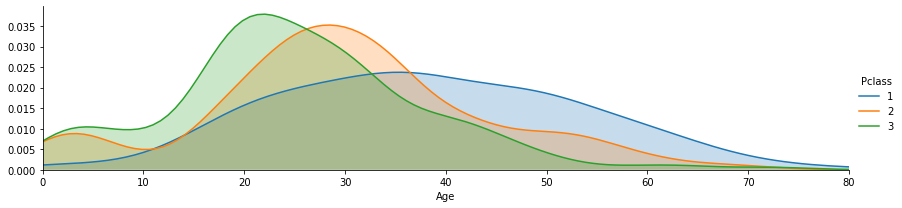

In [16]:
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

In [17]:
#drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [18]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

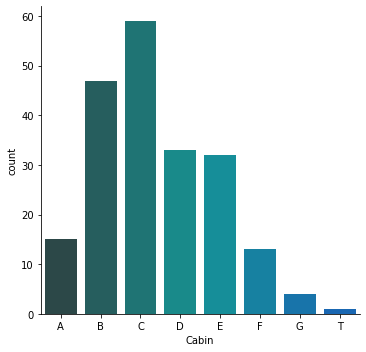

In [19]:
#grab that letter for the deck level 

levels = []

# Loop to grab first letter
for level in deck:
    levels.append(level[0])    

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
cabin_df =cabin_df.sort_values(by = 'Cabin')
sns.catplot('Cabin',data=cabin_df,palette='winter_d',kind='count')

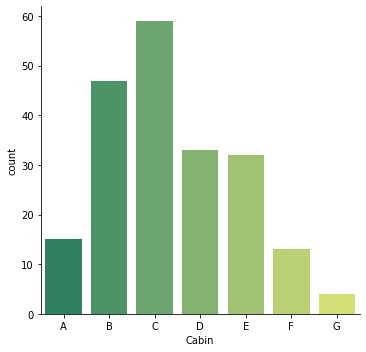

In [20]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']

sns.catplot('Cabin',data=cabin_df,order='ABCDEFG',kind='count',palette='summer')

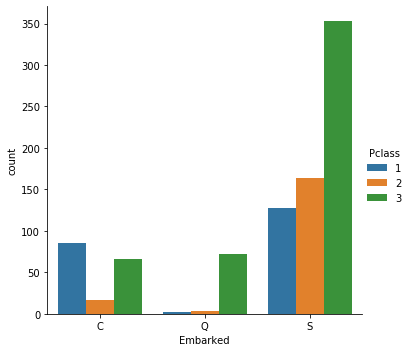

In [21]:
sns.catplot('Embarked', data = titanic_df, hue ='Pclass', order=['C','Q','S'], kind='count')

In [22]:
def family (passenger):
    
    SibSp, Parch = passenger
    
    if SibSp == 0 and Parch == 0:
        return'alone'
    else:
        return'with family'
    

In [23]:
#adding a new column 
titanic_df['Alone'] = titanic_df[['SibSp', 'Parch']].apply(family, axis=1)

In [24]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,alone
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,alone
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,alone
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,with family
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,with family
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,with family


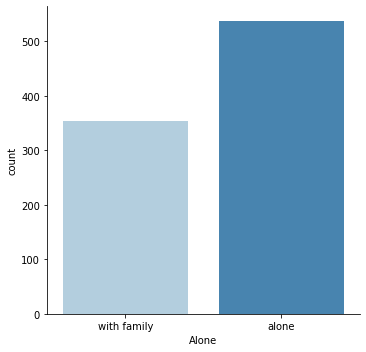

In [25]:
sns.catplot('Alone', data = titanic_df, palette = 'Blues', kind='count')


In [26]:
titanic_df["Survivor"] = titanic_df.Survived.map({0:"no", 1:"yes"})

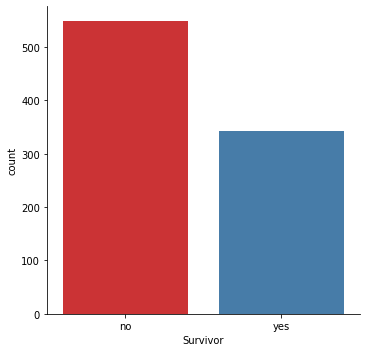

In [27]:
sns.catplot('Survivor', data=titanic_df, palette ='Set1', kind='count')

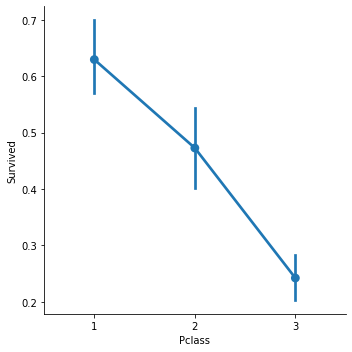

In [28]:
sns.catplot('Pclass','Survived', data= titanic_df, kind='point')

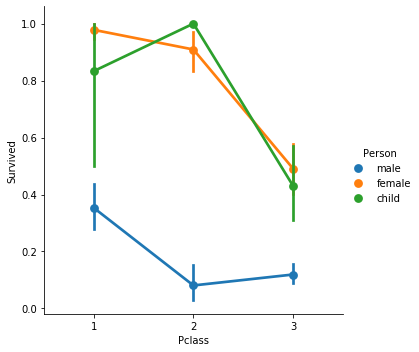

In [29]:
sns.catplot('Pclass', 'Survived', hue='Person',data=titanic_df, kind ='point')
# survival rates for the 3rd class are substantially lower

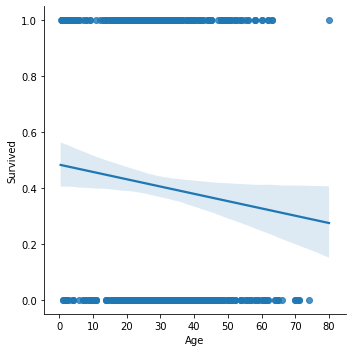

In [30]:
sns.lmplot('Age', 'Survived', data=titanic_df)

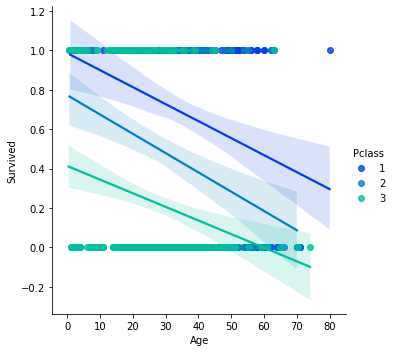

In [31]:
sns.lmplot('Age', 'Survived', hue='Pclass',data=titanic_df, palette='winter')

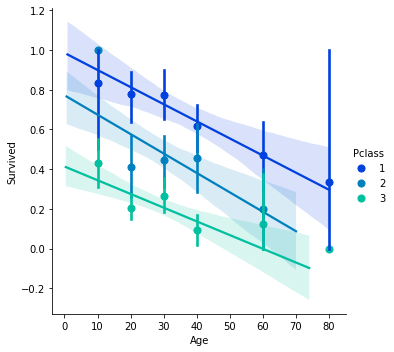

In [32]:
generation = [10,20,30,40,60,80]
sns.lmplot('Age', 'Survived', hue ='Pclass', data= titanic_df,palette = 'winter', x_bins= generation)

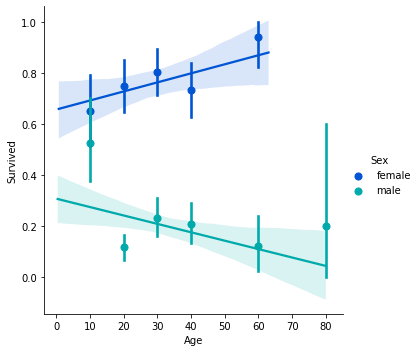

In [33]:
sns.lmplot('Age', 'Survived', hue ='Sex', data= titanic_df,palette = 'winter', hue_order=['female','male'] , x_bins= generation)

In [34]:
cabin_df = pd.concat((cabin_df, titanic_df['Sex']), axis=1)

In [35]:
cabin_df = pd.concat((cabin_df, titanic_df['Survived']), axis=1)

In [36]:
cabin_df = pd.concat((cabin_df, titanic_df['Survivor']), axis=1)

In [37]:
cabin_df.head()

,Cabin,Sex,Survived,Survivor
0,C,male,0,no
1,C,female,1,yes
2,E,female,1,yes
3,G,female,1,yes
4,C,male,0,no


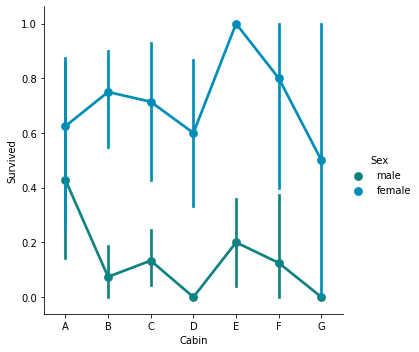

In [46]:
sns.catplot('Cabin', 'Survived',data=cabin_df, hue='Sex',kind='point', palette='winter_d', order=['A','B','C','D','E','F','G'])

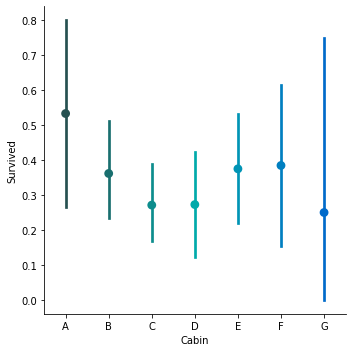

In [39]:
sns.catplot('Cabin', 'Survived',data=cabin_df,  palette='winter_d', kind='point', order=['A','B','C','D','E','F','G'])

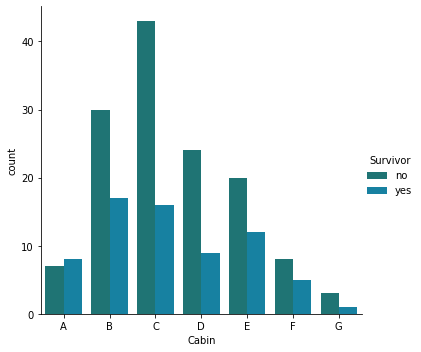

In [40]:
sns.catplot('Cabin', data=cabin_df, hue='Survivor', kind='count',palette='winter_d',order=['A','B','C','D','E','F','G'] )

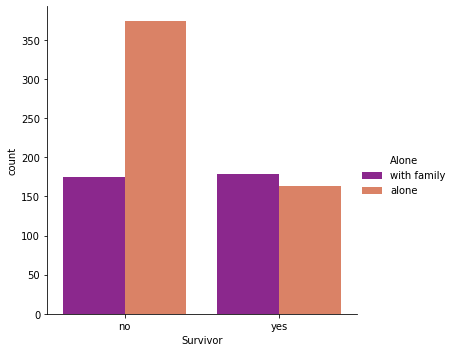

In [41]:
sns.catplot('Survivor', data=titanic_df, hue='Alone', palette='plasma', kind='count')

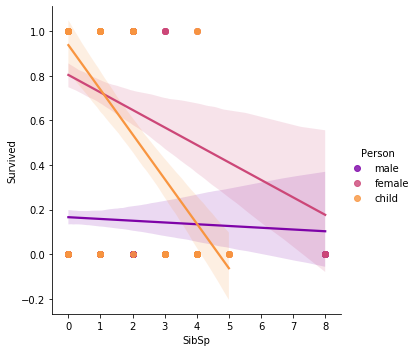

In [42]:
sns.lmplot('SibSp','Survived',data=titanic_df, hue='Person',palette='plasma')

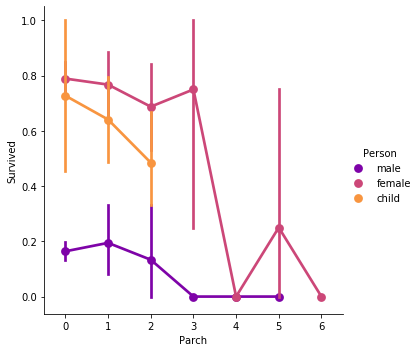

In [43]:
sns.catplot('Parch','Survived',data=titanic_df, hue='Person',palette='plasma', kind='point')

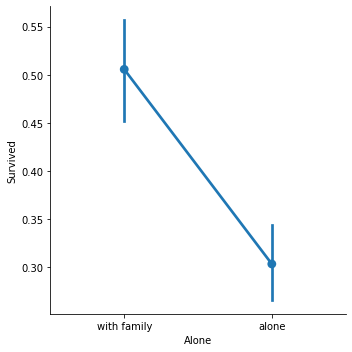

In [44]:
sns.catplot('Alone','Survived', data=titanic_df, kind='point')